In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth, OPTICS
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
from feature_engine.creation import CyclicalFeatures
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from minisom import MiniSom
pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('tab10')
pd.set_option("display.max_columns", None)
import umap

C:\Users\dinis\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%cd ..
%cd Datasets
model_test = pd.read_csv('data_for_modeling.csv', index_col=0)
data = pd.read_csv('data_for_analysis.csv', index_col=0)

c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project
c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project\Datasets


In [3]:
model_test

,transportation_expense,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos,reason_for_absence_Chronic Disease,reason_for_absence_Maternity/Pregnancy-Related,reason_for_absence_Medical Care,reason_for_absence_Mental Disease,reason_for_absence_Unjustified absence,reason_for_absence_Unspecified
0,0.79,0.00,0.50,0.00,0.50,1.00,0.71,0.17,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,1,0
1,-1.32,0.71,-1.62,1.00,0.00,0.00,0.86,-0.50,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
2,-0.57,0.71,-0.12,0.00,-0.50,0.00,0.86,-0.17,0.00,-0.90,0.00,-0.50,-0.87,0.00,-1.00,0,0,1,0,0,0
3,0.67,0.14,-0.25,0.00,0.50,0.00,-0.14,0.17,0.00,3.73,0.00,-0.50,-0.87,-0.87,-0.50,0,0,0,0,0,0
4,0.79,0.00,0.50,0.00,0.50,1.00,0.71,-0.17,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.79,0.00,0.50,0.00,0.50,1.00,0.71,0.83,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
796,0.12,0.14,0.00,0.00,0.00,1.00,0.57,0.17,1.00,2.22,-1.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
797,-1.32,0.00,-0.38,0.00,0.00,4.00,1.29,-0.50,0.00,-0.04,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
798,0.07,0.14,-0.25,0.00,0.50,2.00,1.43,-0.50,0.00,-0.36,0.00,-0.50,-0.87,0.00,-1.00,0,0,0,0,0,1


for i in range(2,20):
    print(f'\n{i}')
    umap_original = umap.UMAP(n_neighbors = i, random_state = 0).fit_transform(model_test)
    plt.scatter(umap_original[:,0], umap_original[:,1])
    plt.legend()
    plt.show()

c:\Users\dinis\anaconda3\envs\DataMining1\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\dinis\AppData\Local\Temp\ipykernel_28388\2025238784.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


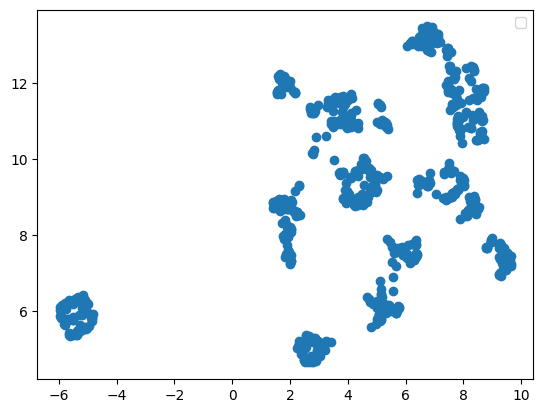

In [4]:
umap_original = umap.UMAP(n_neighbors = 30, random_state = 0).fit_transform(model_test)
plt.scatter(umap_original[:,0], umap_original[:,1])
plt.legend()
plt.show()

# KMeans

In [5]:
k_list = np.arange(1, 16)
inertia = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(model_test)
    inertia.append(kmeans.inertia_)

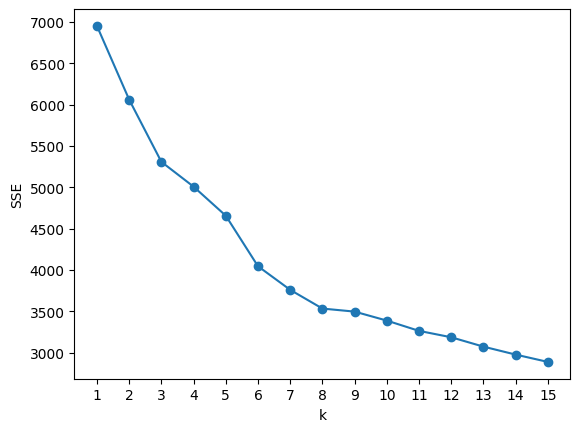

In [6]:
plt.plot(k_list, inertia, marker='o')
# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(k_list)
# call plt.show()
plt.show()

In [7]:
kmeans = KMeans(n_clusters=8, random_state=0)
data['cluster_kmeans'] = kmeans.fit_predict(model_test)


In [8]:
data.groupby('cluster_kmeans').size()

cluster_kmeans
0     64
1    125
2    134
3     47
4    141
5    129
6     76
7     58
dtype: int64

In [9]:
data.groupby('cluster_kmeans').mean() 

,transportation_expense,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,296.72,10.66,30.44,0.14,1.12,0.38,26.36,5.55,0.67,22.40,0.28,0.02,0.06,0.11,0.08,0.12,0.08,0.14,0.11,0.05,0.09,0.08,0.06,0.64,0.34,0.02,0.34,0.06,0.00,0.33,0.00,0.09,0.17
1,206.34,14.94,13.00,0.10,1.27,0.58,30.51,3.66,0.01,9.68,0.56,0.04,0.06,0.15,0.06,0.08,0.10,0.07,0.07,0.09,0.14,0.08,0.06,0.66,0.34,0.00,0.20,0.09,0.00,0.46,0.01,0.09,0.15
2,157.26,9.82,31.90,0.01,0.31,0.00,23.90,3.86,0.39,10.05,0.20,0.15,0.09,0.07,0.07,0.13,0.12,0.07,0.04,0.07,0.08,0.07,0.04,0.59,0.40,0.01,0.20,0.12,0.01,0.58,0.01,0.02,0.06
3,320.49,5.22,31.19,0.11,1.15,4.00,26.00,5.26,0.17,6.83,1.00,0.00,0.04,0.06,0.09,0.13,0.15,0.15,0.15,0.04,0.04,0.09,0.06,0.53,0.47,0.00,0.32,0.00,0.00,0.47,0.00,0.00,0.21
4,270.24,12.70,27.73,0.09,2.08,0.57,25.40,4.76,0.06,7.96,1.00,0.03,0.04,0.06,0.06,0.06,0.07,0.14,0.16,0.11,0.12,0.09,0.06,0.57,0.43,0.01,0.18,0.06,0.01,0.51,0.00,0.07,0.16
5,181.17,17.87,26.47,0.02,0.29,0.00,29.35,3.60,0.13,4.48,1.00,0.07,0.20,0.18,0.07,0.07,0.05,0.06,0.05,0.08,0.04,0.07,0.05,0.60,0.40,0.01,0.16,0.05,0.02,0.68,0.01,0.02,0.07
6,221.21,9.42,36.47,0.03,1.11,2.00,24.11,3.53,0.00,8.43,0.00,0.09,0.14,0.11,0.09,0.07,0.03,0.05,0.00,0.04,0.16,0.12,0.11,0.71,0.26,0.03,0.17,0.08,0.00,0.66,0.00,0.00,0.09
7,222.33,13.66,25.62,0.00,1.36,0.34,26.02,26.21,0.07,10.42,0.83,0.03,0.02,0.16,0.10,0.12,0.14,0.14,0.02,0.10,0.02,0.09,0.07,0.55,0.45,0.00,0.50,0.33,0.00,0.02,0.00,0.02,0.14


In [10]:
def visualize_dimensionality_reduction(transformation: np.array,
                                       targets: list) -> None:
    '''
    Function to plot a scatter plot of the t-SNE or UMAP output.

    Arguments:
        ----------
         - transformation(np.array): Array of t-SNE/UMAP output
         - targets(list): Series containing the assigned
         cluster of all observations

    Returns:
        ----------
         - None, although a plot is produced.
    '''
    # create a scatter plot of the t-SNE output
    ax = sns.scatterplot(x=transformation[:, 0], y=transformation[:, 1],
                         hue=targets, legend='full', edgecolor=None, palette='tab10')
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

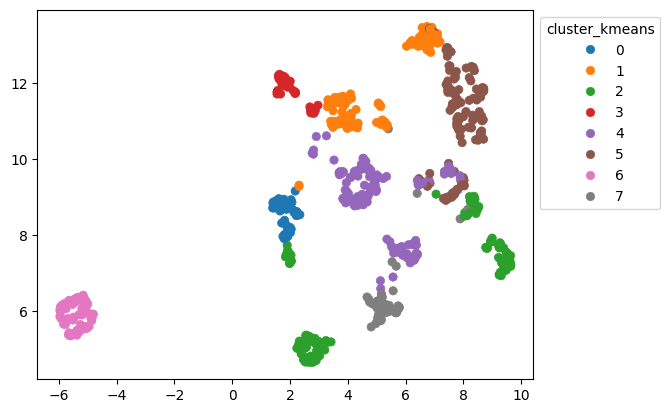

In [11]:
visualize_dimensionality_reduction(umap_original, data['cluster_kmeans'])

# Hierarchical clustering

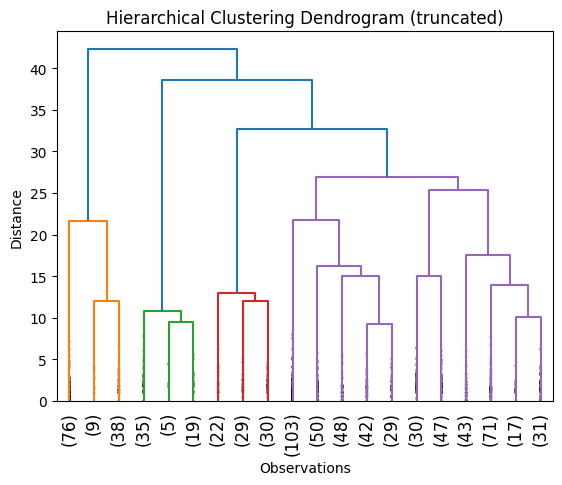

In [12]:
hierarchical = linkage(model_test, 'ward')
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hierarchical,
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

In [13]:
hierarchical = AgglomerativeClustering(n_clusters=8, linkage='ward')
data['cluster_hierarchical'] = hierarchical.fit_predict(model_test)

In [14]:
data.groupby('cluster_hierarchical').size()

cluster_hierarchical
0    162
1    169
2     77
3     81
4     47
5     59
6    103
7     76
dtype: int64

In [15]:
data.groupby('cluster_hierarchical').mean()

,transportation_expense,service_time,years_until_retirement,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified,cluster_kmeans
cluster_hierarchical,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,267.88,12.87,25.81,0.12,2.15,0.65,28.37,4.43,0.00,8.19,0.81,0.04,0.03,0.09,0.06,0.05,0.05,0.12,0.13,0.12,0.16,0.09,0.06,0.59,0.41,0.01,0.15,0.05,0.01,0.48,0.00,0.12,0.20,3.14
1,171.39,11.90,29.57,0.01,0.51,0.01,23.56,4.01,0.35,9.54,0.45,0.14,0.08,0.10,0.07,0.11,0.13,0.07,0.07,0.07,0.05,0.07,0.05,0.58,0.41,0.01,0.22,0.11,0.02,0.55,0.01,0.03,0.07,2.79
2,174.22,15.09,9.44,0.08,1.16,0.49,27.92,3.64,0.01,8.99,0.68,0.04,0.08,0.19,0.06,0.09,0.13,0.06,0.06,0.06,0.09,0.06,0.05,0.69,0.31,0.00,0.23,0.10,0.00,0.52,0.01,0.01,0.12,1.10
3,286.58,10.54,29.84,0.11,1.06,0.40,26.22,5.33,0.72,20.97,0.30,0.01,0.09,0.10,0.07,0.17,0.07,0.12,0.09,0.04,0.11,0.07,0.05,0.62,0.37,0.01,0.33,0.06,0.01,0.36,0.00,0.07,0.16,0.49
4,320.49,5.22,31.19,0.11,1.15,4.00,26.00,5.26,0.17,6.83,1.00,0.00,0.04,0.06,0.09,0.13,0.15,0.15,0.15,0.04,0.04,0.09,0.06,0.53,0.47,0.00,0.32,0.00,0.00,0.47,0.00,0.00,0.21,3.00
5,216.93,13.32,26.37,0.00,1.24,0.36,26.00,26.03,0.12,10.22,0.78,0.05,0.03,0.14,0.12,0.12,0.10,0.14,0.02,0.08,0.03,0.08,0.08,0.58,0.42,0.00,0.51,0.34,0.00,0.05,0.00,0.00,0.10,6.58
6,179.00,18.00,27.00,0.02,0.00,0.00,31.00,3.30,0.00,3.51,1.00,0.05,0.21,0.15,0.07,0.04,0.06,0.08,0.07,0.10,0.05,0.08,0.06,0.59,0.40,0.01,0.12,0.06,0.00,0.74,0.01,0.01,0.07,5.00
7,221.21,9.42,36.47,0.03,1.11,2.00,24.11,3.53,0.00,8.43,0.00,0.09,0.14,0.11,0.09,0.07,0.03,0.05,0.00,0.04,0.16,0.12,0.11,0.71,0.26,0.03,0.17,0.08,0.00,0.66,0.00,0.00,0.09,6.00


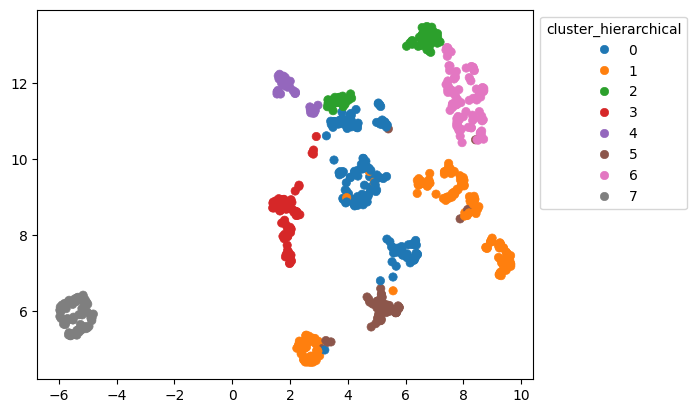

In [16]:
visualize_dimensionality_reduction(umap_original, data['cluster_hierarchical'])

# Density Based methods


## DBSCAN

In [17]:
dbscan = DBSCAN(eps=2.1, n_jobs=-1)
data['cluster_dbscan'] = dbscan.fit_predict(model_test)


In [18]:
data.groupby('cluster_dbscan').size()

cluster_dbscan
-1     71
 0    618
 1     30
 2     11
 3      6
 4     14
 5      5
 6      7
 7      7
 8      5
dtype: int64

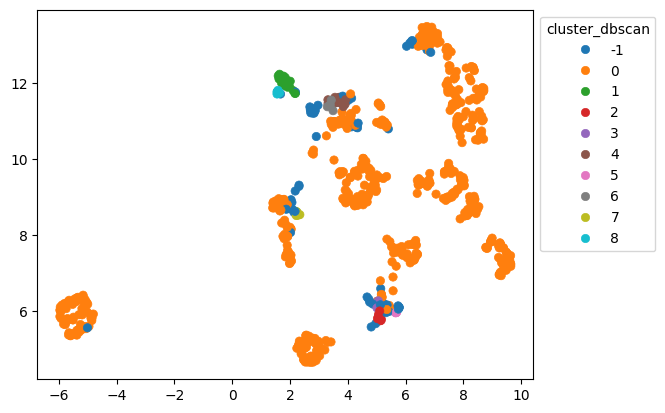

In [19]:
visualize_dimensionality_reduction(umap_original, data['cluster_dbscan'])

## Meanshift

In [20]:
bandwidth = estimate_bandwidth(model_test)
meanshift = MeanShift(bandwidth=bandwidth)
data['cluster_meanshift'] = meanshift.fit_predict(model_test)

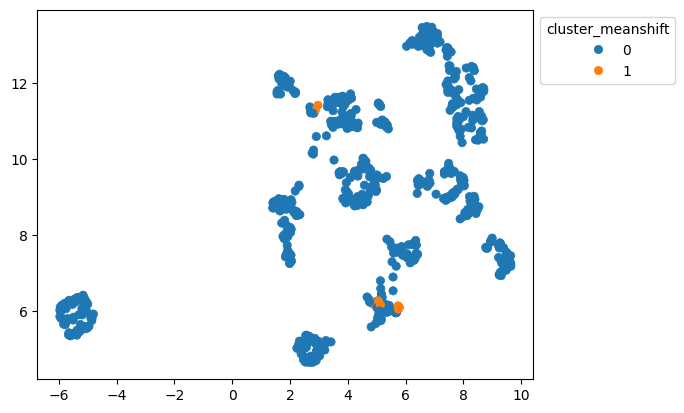

In [21]:
visualize_dimensionality_reduction(umap_original, data['cluster_meanshift'])

## Optics

In [22]:
optics = OPTICS(min_samples=7, metric='euclidean')
data['cluster_optics'] = optics.fit_predict(model_test)

In [23]:
data.groupby('cluster_optics').size()

cluster_optics
-1     521
 0      21
 1       7
 2      10
 3       7
 4       9
 5       8
 6       9
 7      16
 8       7
 9       9
 10     10
 11     16
 12     48
 13     14
 14     11
 15     12
 16     10
 17     10
 18      8
 19     11
dtype: int64

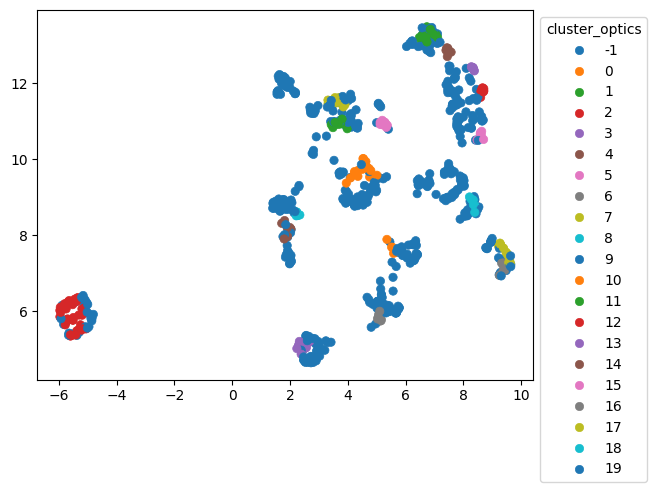

In [24]:
visualize_dimensionality_reduction(umap_original, data['cluster_optics'])